# 가격 정책에 대한 경제학 이론

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb
import warnings; warnings.simplefilter('ignore')
plt.style.use('seaborn')
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 수요함수 기초
제품에 대한 소비자 가치

In [2]:
n_consumer = 1000 #잠재 소비자 수
np.random.seed(0) # 랜덤 시드 결정
# 각 소비자의 제품에 대한 가치(정규분포 가정)
value = np.random.normal(100, 20, n_consumer) #평균100, 표준편차20
print(value)

[135.28104692 108.00314417 119.57475968 144.81786398 137.3511598
  80.4544424  119.00176835  96.97285583  97.93562296 108.21197004
 102.88087142 129.08547014 115.2207545  102.43350033 108.87726465
 106.67348655 129.88158146  95.89683472 106.26135403  82.91808521
  48.94020368 113.07237191 117.28872398  85.15669959 145.39509248
  70.91268651 100.91517035  96.256323   130.65558429 129.3871754
 103.09894851 107.56325039  82.24428505  60.38407064  93.04175701
 103.12697938 124.60581361 124.04759698  92.25346365  93.95394499
  79.0289407   71.59964126  65.87459619 139.0155079   89.80695636
  91.23851397  74.9440928  115.54980712  67.72204305  95.7451944
  82.09066878 107.73804996  89.78389725  76.38735632  99.43635543
 108.56663741 101.33034445 106.04943795  87.31355813  92.74517668
  86.55079104  92.80893677  83.73707436  65.47434795 103.54852285
  91.96438128  67.39603306 109.25564511  81.85403271 101.03890792
 114.58181124 102.57965822 122.78801369  75.30348359 108.04683282
  86.30379818

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

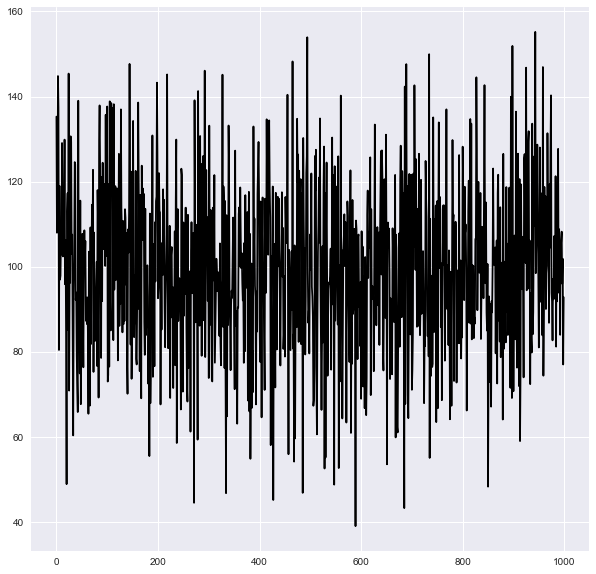

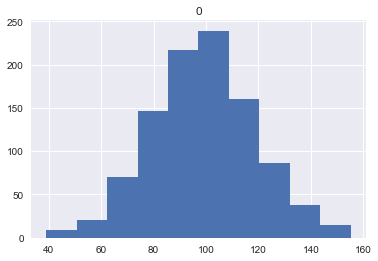

In [3]:
plt.figure(figsize=(10,10))

plt.plot(value,'black')
pd.DataFrame(value).hist()

## 수요함수 정의
언제 구매가 이루어질까?

In [4]:
# 가격이 주어질 경우
# value > price 안 소비자 수를 리턴
def demand(p, value):
    return np.count_nonzero(np.array(value) > p)

In [5]:
demand(100, value)
# 가격이 100일 때 수요는?

476

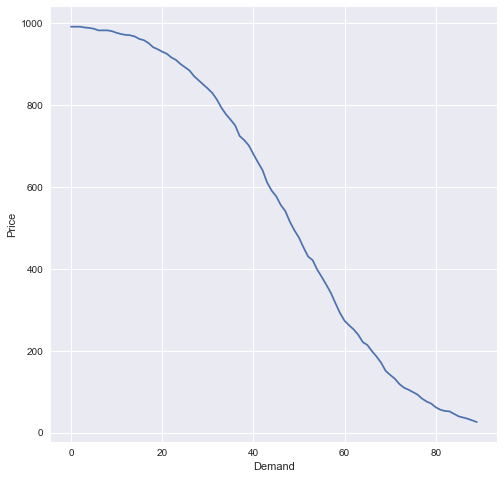

In [6]:
plt.figure(figsize=(8,8))
range_p = np.arange(50, 140) #가격 범위 설정
plt.plot([demand(p, value) for p in range_p]) # 주어진 가격 범위에서 수요를 그림으로
plt.xlabel('Demand') 
plt.ylabel('Price')
plt.show()

소득 수준

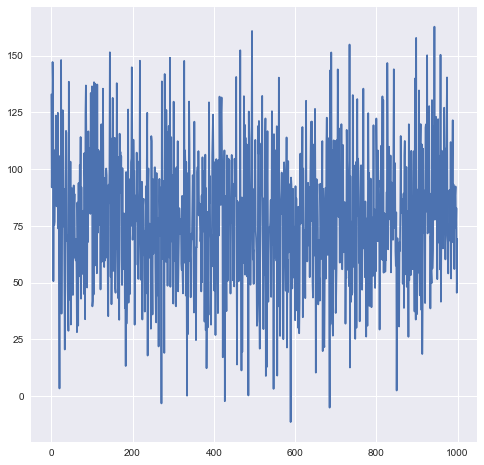

In [7]:
np.random.seed(0)
income = np.random.normal(80, 30, n_consumer) #평균80, 표준편차30
plt.figure(figsize=(8,8))
plt.plot(income)

언제 구매가 이루어질까?

In [8]:
# 조건1: 가격이주어지면
# income > price 이면 1로 표시한다
def afford(p, income):
    return 1 * (income > p)

# 조건2: 가격이 주어지면
# value > price 이면 1로 표시한다
def vtp(p, value):
    return 1 * (value > p) 

# 새로운 수요함수 정의
# 두 조건이 모두 만족되어야 구매
# 두 조건이 모두 만족되는 소비자(afford=1, vtp=1)의 수의 수를 리턴
def demand_2(p, value, income):
    return np.sum(afford(p,income)*vtp(p,value))

In [9]:
price = 100  # 가격수준 가정
x1 = pd.DataFrame(afford(price, income), columns = ['affordable?'])
x1['value above price?'] = vtp(price, value)
x1['buy?'] = afford(price, income) * vtp(price, value)
x1

,affordable?,value above price?,buy?
0,1,1,1
1,0,1,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
995,0,1,0
996,0,0,0
997,0,1,0
998,0,0,0


In [10]:
demand_2(price, value, income) # 가격이 100일 때 수요

236

In [11]:
demand_2(50, value, income)

840

소비자 후생(잉여, Consumer surplus)

In [12]:
# 가격을 입력하면
# 두 조건을 만족하는 소비자에 대해 value-p만큼 합산
def CS(p, value, income):
    return np.sum(afford(p, income) * vtp(p, value) * (value-p))

In [13]:
price = 100
print(f'Consumer Surplus = {CS(price, value, income)}')

Consumer Surplus = 5942.621487952012


독점기업의 가격 결정

In [14]:
# 단위당 생산비용
unit_cost = 30

이윤 함수 설정

In [15]:
# 가격을 입력하면
# 단위당 마진(p - unit_cost)에 수요를 곱해 계산된다.
def profits(p):
    return (p - unit_cost) * demand_2(p, value, income)

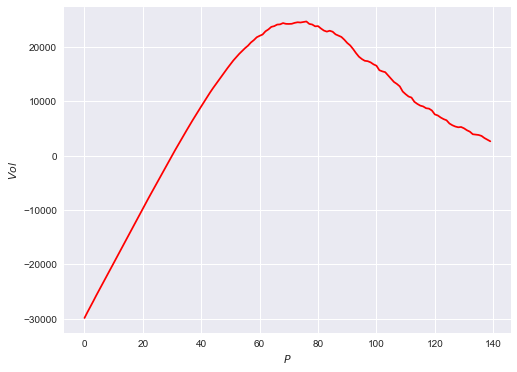

In [16]:
plt.figure(figsize=(8,6))
range_p = np.arange(0, 140)
plt.plot(range_p, [profits(p) for p in range_p], 'r')
plt.xlabel("$P$")
plt.ylabel("$Vol$")
plt.show()

## 최적가격이 얼마인가?

In [17]:
p_m = optimize.fminbound(lambda x: -profits(x), 0, 140)

print('================')
print(f'optimal price = {p_m}') #최적 가격
print('================')
print(f'Monopoly Profits = {profits(p_m)}') # 최적가격에서의 이윤
print('================')
print(f'Supply Demand = {demand_2(p_m,value,income)}') # 최적 가격에서의 수요와 공급
print('================')
print(f'Social Welfare = {profits(p_m) + CS(p_m, value, income)}') # 최적가격에서의 사회후생(아윤+소비자잉여)
print('================')

optimal price = 76.45507441783815
Monopoly Profits = 24667.644515872056
Supply Demand = 531
Social Welfare = 44504.77539646452


## 완전경쟁 시장이라면??
## 가격이 얼마인가

In [18]:
p_c = unit_cost # price-marginal cost

## 이윤과 공급, 후생은 어떻게 결정되는가?

In [19]:
print('================')
print(f'Price = {p_c}') #최적 가격
print('================')
print(f'Profits = {profits(p_c)}') # 최적가격에서의 이윤
print('================')
print(f'Supply Demand = {demand_2(p_c,value,income)}') # 최적 가격에서의 수요와 공급(공급은 수요만큼)
print('================')
print(f'Social Welfare = {CS(p_c, value, income)}') # 최적가격에서의 소비자잉여(아윤은 0)
print('================')

Price = 30
Profits = 0
Supply Demand = 954
Social Welfare = 67813.4018701353


## 독점으로 인해 소비자 후생은 얼마나 감소하였는가

In [20]:
print('================')
print(f'(1) Perfect competition = {CS(p_c, value, income)}') 
print('================')
print(f'(2) Monopoly = {CS(p_m, value, income)}') 
print('================')
print(f'(1) - (2) = {CS(p_c, value, income) - CS(p_m, value, income)}')
print('================')

(1) Perfect competition = 67813.4018701353
(2) Monopoly = 19837.13088059247
(1) - (2) = 47976.270989542834


## 독점으로 인해 사회 후생은 얼마나 감소하였는가

In [21]:
print('================')
print(f'(3) Perfect competition = {CS(p_c, value, income)}') 
print('================')
print(f'(4) Monopoly = {CS(p_m, value, income) + profits(p_m)}') 
print('================')
print(f'(3) - (4) = {CS(p_c, value, income) - CS(p_m, value, income) - profits(p_m)}')
print('================')

(3) Perfect competition = 67813.4018701353
(4) Monopoly = 44504.77539646452
(3) - (4) = 23308.626473670778


# 복점시장(duopoly): 두 기업이 경쟁하면?
* 제품차별화 (Apple vs Samsung)
* 소비자가 인식하는 가치가 다르다
* 두 제품에 대한 가치를 만들어 보자

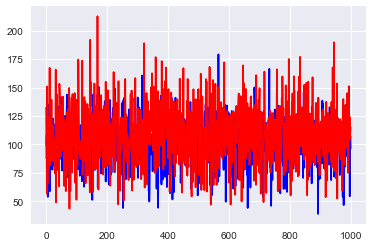

,value1,value2
0,132.486907,99.581054
1,87.764872,108.593329
2,89.436565,56.595098
3,78.540628,151.006770
4,117.308153,65.164110
...,...,...
995,97.671117,112.048295
996,54.454040,124.218140
997,98.607509,104.137933
998,107.077409,110.877756


In [22]:
# 각 소비자의 제품1에 대한 가치
np.random.seed(1) 
value1 = np.random.normal(100, 20, n_consumer) 

# 각 소비자의 제품2에 대한 가치
np.random.seed(2) 
value2 = np.random.normal(110, 25, n_consumer) 

plt.plot(value1, 'b')
plt.plot(value2, 'r')
plt.show()

value = pd.DataFrame(value1, columns=['value1'])
value['value2'] = value2
value

수요함수 (1을 구매하거나 2를 구매하거나 둘다 구매하지않음)

In [23]:
def choice(p1, p2):                                                 ## 두 제품의 가격이 주어질 경우,                                           
    cs_1 = value1 - p1                                               ## 제품 1 구매시 소비자잉여
    cs_2 = value2 - p2                                               ## 제품 2 구매시 소비자잉여        
    cs_0 = 0                                                        ## 둘 다 구매하지 않을 경우 소비자잉여
    demand1 = np.sum((cs_1 > cs_2) * (cs_1 > cs_0))                 ## cs_1이 가장 높은 소비자 수               
    demand2 = np.sum((cs_2 > cs_1) * (cs_2 > cs_0))                 ## cs_2가 가장 높은 소비자 수               
    return [n_consumer - demand1 - demand2, demand1, demand2]     ## 0/1/2/ 구매자 수를 리턴                                                

In [24]:
p1 = 100; p2 = 110
print(choice(p1, p2))

[255, 389, 356]


단위 당 비용

In [25]:
cost_1 = 30
cost_2 = 25

이윤함수

In [30]:
def profit2(p1, p2):
    profit_1 = (p1 - cost_1) * choice(p1,p2)[1] #제품 1의 이윤
    profit_2 = (p2 - cost_2) * choice(p1,p2)[2] #제품 2의 이윤
    return [0, profit_1, profit_2] # 0/1/2 의 이윤

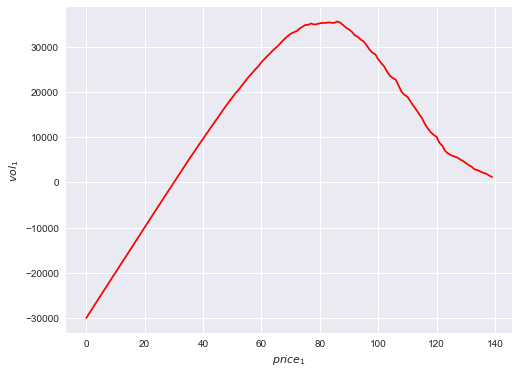

Current Price of p2 = 110
Optinal Price of p1 = 84.65379967475695


In [32]:
# 기업1의 최저가격 결정
plt.figure(figsize=(8,6))

range_p = np.arange(0,140)
plt.plot(range_p, [profit2(p1,p2)[1] for p1 in range_p], 'r') # 제품 1의 이윤
plt.xlabel("$price_1$")
plt.ylabel("$vol_1$")
plt.show()

p1 = optimize.fminbound(lambda x: -profit2(x,p2)[1], 0, 140)
print('================')
print(f'Current Price of p2 = {p2}') 
print('================')
print(f'Optinal Price of p1 = {p1}') 
print('================')

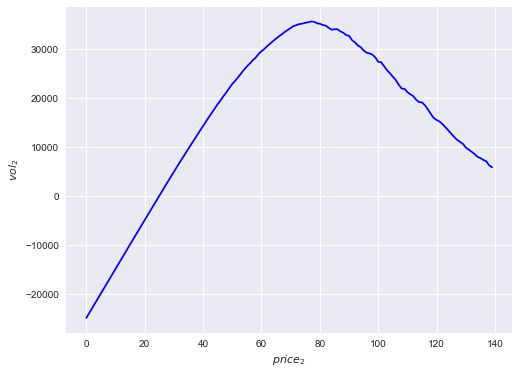

Current Price of p1 = 84.65379967475695
Optinal Price of p2= 78.60468977783053


In [33]:
# 기업2의 최저가격 결정
plt.figure(figsize=(8,6))

range_p = np.arange(0,140)
plt.plot(range_p, [profit2(p1,p2)[2] for p2 in range_p], 'b') # 제품 2의 이윤
plt.xlabel("$price_2$")
plt.ylabel("$vol_2$")
plt.show()

p2 = optimize.fminbound(lambda x: -profit2(p1,x)[2], 0, 140)
print('================')
print(f'Current Price of p1 = {p1}') 
print('================')
print(f'Optinal Price of p2= {p2}') 
print('================')

이러한 최적화 과정을 반복하면? >> **균형가격**

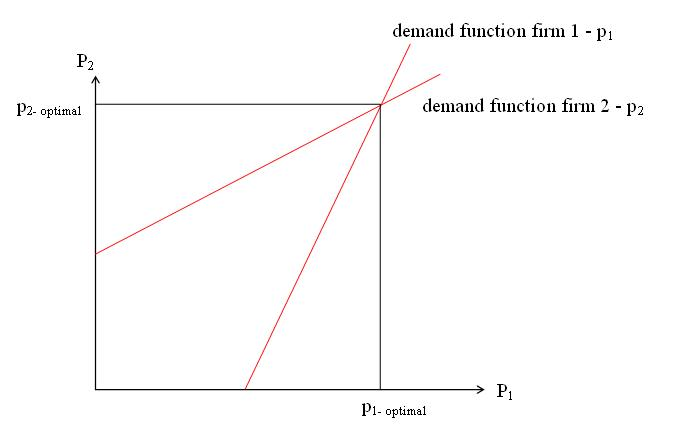